In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hands17 import hands17

hands17.pre_provide(
    '/home/xwu/data/hands17',
    '/home/xwu/projects/univue-hand-pose/output/hands17'
)

splitted data: [  0 945] training, [945 999] test.
using shuffled data: /home/xwu/projects/univue-hand-pose/output/hands17/annotation_shuffled.txt
using cropped and resized images: /home/xwu/projects/univue-hand-pose/output/hands17/cropped
images are splitted out for evaluation: 64 portions


drawing pose #26: /home/xwu/data/hands17/training/images/image_D00000823.png


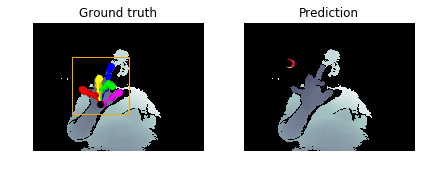

In [3]:
hands17.draw_pred_random(
    hands17.training_images,
    hands17.training_annot_evaluation,
    hands17.training_annot_prediction
)

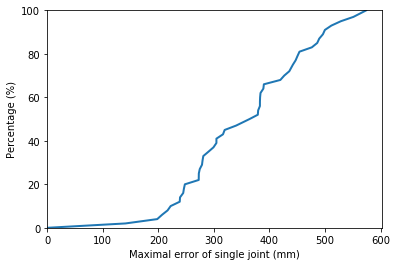

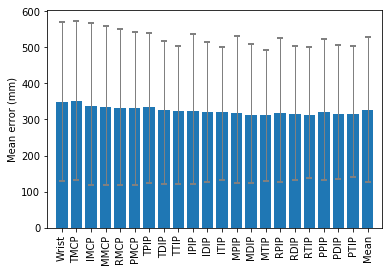

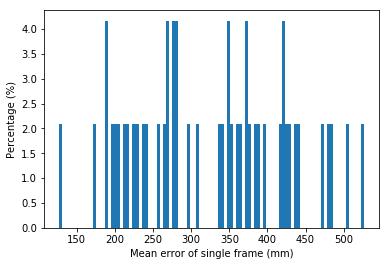

In [8]:
import matplotlib.pyplot as mpplot

errors = hands17.compare_error(
    hands17.training_annot_evaluation,
    hands17.training_annot_prediction
)
mpplot.subplot()
hands17.draw_error_percentage_curve(errors, mpplot.gca())
mpplot.show()
mpplot.subplot()
hands17.draw_error_per_joint(errors, mpplot.gca())
mpplot.subplot()
mpplot.show()
hands17.draw_mean_error_distribution(errors, mpplot.gca())
mpplot.show()

drawing BoundingBox #524: /home/xwu/data/hands17/frame/images/image_D00000524.png


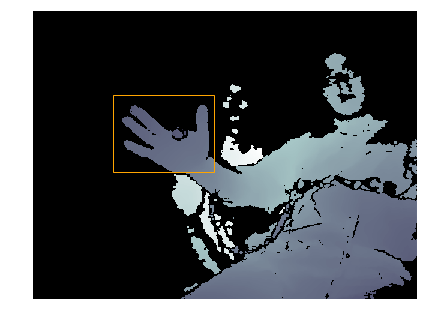

In [5]:
hands17.draw_bbox_random()

drawing pose #213: /home/xwu/data/hands17/training/images/image_D00000213.png


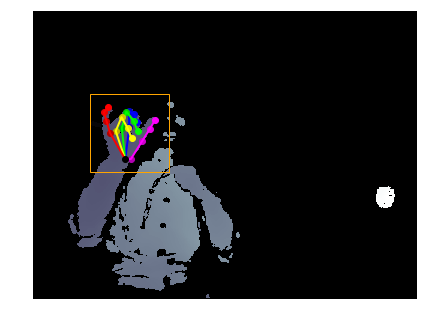

drawing pose #37: /home/xwu/projects/univue-hand-pose/output/hands17/cropped/image_D00000924.png


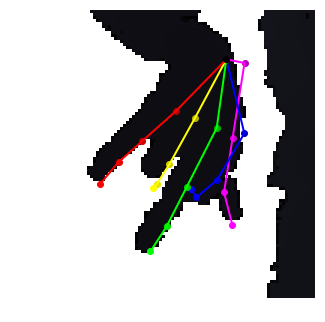

37

In [6]:
hands17.draw_pose_random(
    hands17.training_images,
    hands17.training_annot_cleaned
)
hands17.draw_pose_random(
    hands17.training_cropped,
    hands17.training_annot_cropped
)

drawing hist: /home/xwu/projects/univue-hand-pose/output/hands17/cropped/image_D00000430.png


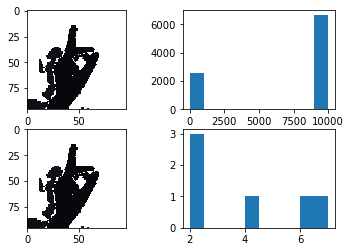

430

In [7]:
hands17.draw_hist_random(
    # hands17.training_images
    hands17.training_cropped
)